In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/COnceptAI

/content/drive/MyDrive/COnceptAI


## **3.1 Problem - 1: Getting Started with Data Exploration - Some Warm up Exercises:**

**1. Data Exploration and Understanding:**



**Dataset Overview:**



1. Load the dataset and display the first 10 rows.
2. Identify the number of rows and columns in the dataset.
3. List all the columns and their data types.








a.  Importing and loading dataset



In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("WHR-2024-5CS037.csv")

b. Display the first 10 rows.

In [5]:
data.head(10)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298
5,Netherlands,7.319,1.901,1.462,0.706,0.725,0.247,0.372,1.906
6,Norway,7.302,1.952,1.517,0.704,0.835,0.224,0.484,1.586
7,Luxembourg,7.122,2.141,1.355,0.708,0.801,0.146,0.432,1.540
8,Switzerland,7.060,1.970,1.425,0.747,0.759,0.173,0.498,1.488
9,Australia,7.057,1.854,1.461,0.692,0.756,0.225,0.323,1.745


c. Number of rows and columns in the dataset.

In [6]:
print(f"Rows: {data.shape[0]}, Columns: {data.shape[1]}")

Rows: 143, Columns: 9


d. Data Types

In [12]:
data.dtypes

,0
Country name,object
score,float64
Log GDP per capita,float64
Social support,float64
Healthy life expectancy,float64
Freedom to make life choices,float64
Generosity,float64
Perceptions of corruption,float64
Dystopia + residual,float64


**Basic Statistics:**

1. Calculate the mean, median, and standard deviation
for the Score column.
2. Identify the country with the highest and lowest happiness scores.


In [11]:
mean = data['score'].mean()
median = data['score'].median()
std = data['score'].std()
print(f" Mean: {mean}, \n Median: {median}, \n Std: {std}")

 Mean: 5.52758041958042, 
 Median: 5.785, 
 Std: 1.1707165099442995


In [13]:
highest = data.loc[data['score'].idxmax(), 'Country name']
lowest = data.loc[data['score'].idxmin(), 'Country name']
print(f" Highest Happiness Score: {highest} \n Lowest Happiness Score: {lowest}")

 Highest Happiness Score: Finland 
 Lowest Happiness Score: Afghanistan


**Missing Values:**
1. Check if there are any missing values in the dataset. If so, display the total count for each column.


In [12]:
print(data.isnull().sum())

Country name                    0
score                           0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


**Filtering and Sorting:**
1. Filter the dataset to show only the countries with a Score greater than 7.5.
2. For the filtered dataset - Sort the dataset by GDP per Capita in descending order and display the
top 10 rows.


In [14]:
filtered = data[data['score'] > 7.5]
sorted_filtered = filtered.sort_values(by="Log GDP per capita", ascending=False).head(10)
sorted_filtered

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082


**Adding New Columns:**
1. Create a new column called Happiness Category that categorizes countries into three categories
based on their Score:

* Low − (Score < 4)

* Medium − (4 ≤ Score ≤ 6)

* High − (Score > 6)

In [15]:
def categorize(score):
  if score < 4:
    return "Low"
  elif 4 <= score <=6:
    return "Medium"
  else:
    return " High"
data["Happiness Category"] = data["score"].apply(categorize)
data[["Country name", "score", "Happiness Category"]]

,Country name,score,Happiness Category
0,Finland,7.741,High
1,Denmark,7.583,High
2,Iceland,7.525,High
3,Sweden,7.344,High
4,Israel,7.341,High
...,...,...,...
138,Congo (Kinshasa),3.295,Low
139,Sierra Leone,3.245,Low
140,Lesotho,3.186,Low
141,Lebanon,2.707,Low


**2. Data Visualizations:**

* Bar Plot - Top 10 Happiest Countries:

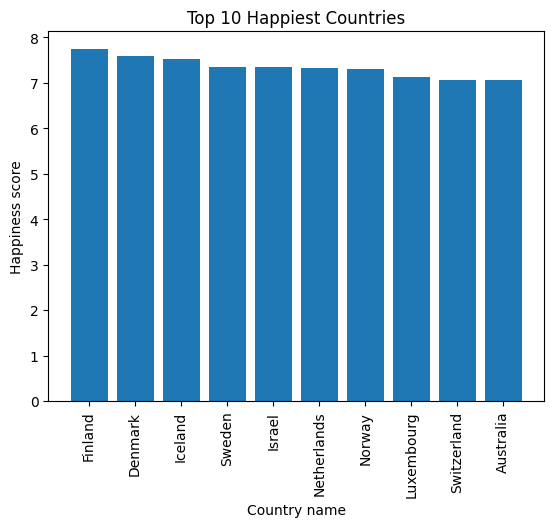

In [22]:
top10 = data.nlargest(10, 'score')
plt.bar(top10['Country name'], top10['score'])
plt.title("Top 10 Happiest Countries")
plt.xlabel("Country name")
plt.ylabel("Happiness score")
plt.xticks(rotation=90)
plt.show()

* Line Plot - Top 10 Unhappiest Countries:

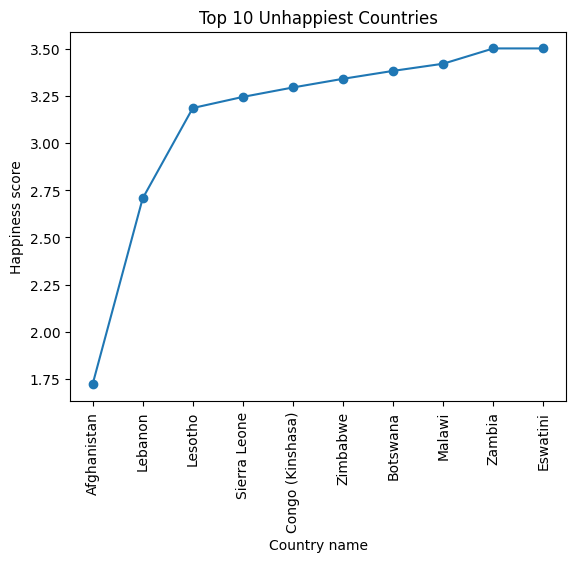

In [17]:
bottom10 = data.nsmallest(10, 'score')
plt.plot(bottom10['Country name'], bottom10['score'], marker='o')
plt.title("Top 10 Unhappiest Countries")
plt.xlabel("Country name")
plt.ylabel("Happiness score")
plt.xticks(rotation=90)
plt.show()

* Histogram for Score:

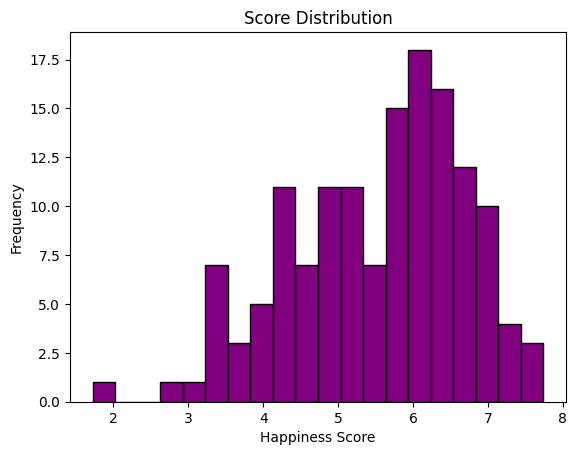

In [30]:
plt.hist(data['score'], bins=20, color='purple', edgecolor='black')
plt.title("Score Distribution")
plt.xlabel("Happiness Score")
plt.ylabel("Frequency")
plt.show()

*   Scatter Plot (GDP per Capita vs Score):


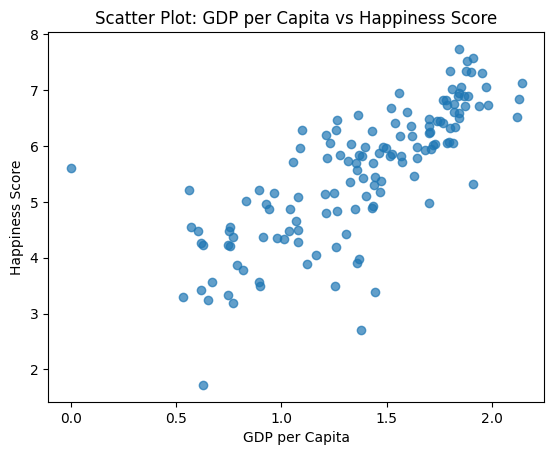

In [36]:
plt.scatter(data['Log GDP per capita'], data['score'], alpha=0.7)
plt.title("Scatter Plot: GDP per Capita vs Happiness Score")
plt.xlabel("GDP per Capita")
plt.ylabel("Happiness Score")
plt.show()

# **3.2 Problem - 2 - Some Advance Data Exploration Task:**

 1. **Task - 1 - Setup Task - Preparing the South-Asia Dataset:**


*   Steps:
1. Define the countries in South Asia with a list for example:
south asian countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",
"Maldives", "Nepal", "Pakistan", "Srilanka"]
2. Use the list from step - 1 to filtered the dataset {i.e. filtered out matching dataset from list.}
3. Save the filtered dataframe as separate CSV files for future use.

In [37]:
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",
                         "Maldives", "Nepal", "Pakistan", "Sri Lanka"]
south_asia = data[data['Country name'].isin(south_asian_countries)]
south_asia.to_csv("SouthAsia.csv", index=False)
south_asia

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756
127,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919
142,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672


**2**. **Task - 2 - Composite Score Ranking:**

**Tasks:**

**1. Using the SouthAsia DataFrame, create a new column called Composite Score that combines the
following metrics:**

    Composite Score = 0.40 × GDP per Capita + 0.30 × Social Support + 0.30 × Healthy Life Expectancy


In [38]:
south_asia['Composite Score'] = (0.40 * south_asia['Log GDP per capita'] +
                                0.30 * south_asia['Social support'] +
                                0.30 * south_asia['Healthy life expectancy'])

print("South Asia DataFrame with Composite Score:")
south_asia[['Country name', 'Log GDP per capita', 'Social support',
                  'Healthy life expectancy', 'Composite Score']]


South Asia DataFrame with Composite Score:


<ipython-input-38-f396746e5aee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_asia['Composite Score'] = (0.40 * south_asia['Log GDP per capita'] +


,Country name,Log GDP per capita,Social support,Healthy life expectancy,Composite Score
92,Nepal,0.965,0.990,0.443,0.8159
107,Pakistan,1.069,0.600,0.321,0.7039
125,India,1.166,0.653,0.417,0.7874
127,Sri Lanka,1.361,1.179,0.586,1.0739
128,Bangladesh,1.122,0.249,0.513,0.6774
142,Afghanistan,0.628,0.000,0.242,0.3238


**2. Rank the South Asian countries based on the Composite Score in descending order.**

In [43]:
south_asia_sorted = south_asia.sort_values(by='Composite Score', ascending=False)

print("South Asian countries ranked by Composite Score:")
south_asia_sorted[['Country name', 'Composite Score']]


South Asian countries ranked by Composite Score:


,Country name,Composite Score
127,Sri Lanka,1.0739
92,Nepal,0.8159
125,India,0.7874
107,Pakistan,0.7039
128,Bangladesh,0.6774
142,Afghanistan,0.3238


**3. Visualize the top 5 countries using a horizontal bar chart showing the Composite Score.**

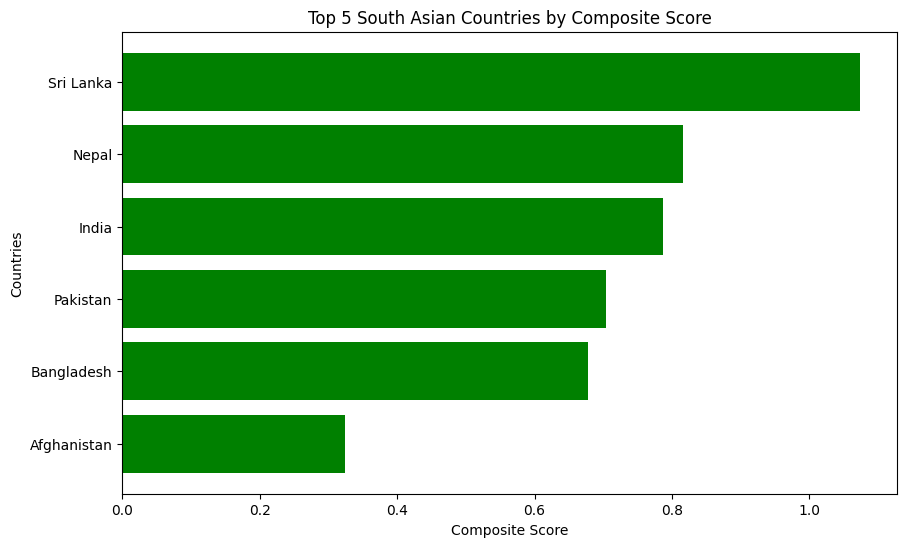

In [44]:
top5_composite = south_asia_sorted.head(10)

plt.figure(figsize=(10, 6))
plt.barh(top5_composite['Country name'], top5_composite['Composite Score'], color='green')
plt.xlabel("Composite Score")
plt.ylabel("Countries")
plt.title("Top 5 South Asian Countries by Composite Score")
plt.gca().invert_yaxis()
plt.show()


**4. Discuss whether the rankings based on the Composite Score align with the original Score - support your discussion with some visualization plot.**

<ipython-input-45-577d5ceaeab3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comparison['Rank by Score'] = comparison['score'].rank(ascending=False)
<ipython-input-45-577d5ceaeab3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comparison['Rank by Composite Score'] = comparison['Composite Score'].rank(ascending=False)


Comparison of Original Score and Composite Score Rankings:
    Country name  score  Composite Score  Rank by Score  \
127    Sri Lanka  3.898           1.0739            4.0   
92         Nepal  5.158           0.8159            1.0   
125        India  4.054           0.7874            3.0   
107     Pakistan  4.657           0.7039            2.0   
128   Bangladesh  3.886           0.6774            5.0   
142  Afghanistan  1.721           0.3238            6.0   

     Rank by Composite Score  
127                      1.0  
92                       2.0  
125                      3.0  
107                      4.0  
128                      5.0  
142                      6.0  


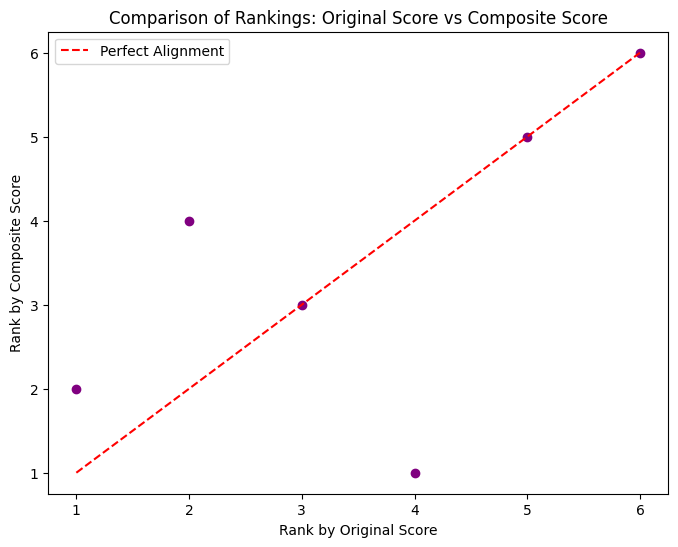

In [45]:
# Create a comparison DataFrame
comparison = south_asia_sorted[['Country name', 'score', 'Composite Score']]
comparison['Rank by Score'] = comparison['score'].rank(ascending=False)
comparison['Rank by Composite Score'] = comparison['Composite Score'].rank(ascending=False)

# Display the comparison table
print("Comparison of Original Score and Composite Score Rankings:")
print(comparison[['Country name', 'score', 'Composite Score', 'Rank by Score', 'Rank by Composite Score']])

# Scatter plot to compare rankings
plt.figure(figsize=(8, 6))
plt.scatter(comparison['Rank by Score'], comparison['Rank by Composite Score'], color='purple')
plt.plot([1, len(comparison)], [1, len(comparison)], linestyle='--', color='red', label='Perfect Alignment')
plt.xlabel("Rank by Original Score")
plt.ylabel("Rank by Composite Score")
plt.title("Comparison of Rankings: Original Score vs Composite Score")
plt.legend()
plt.show()


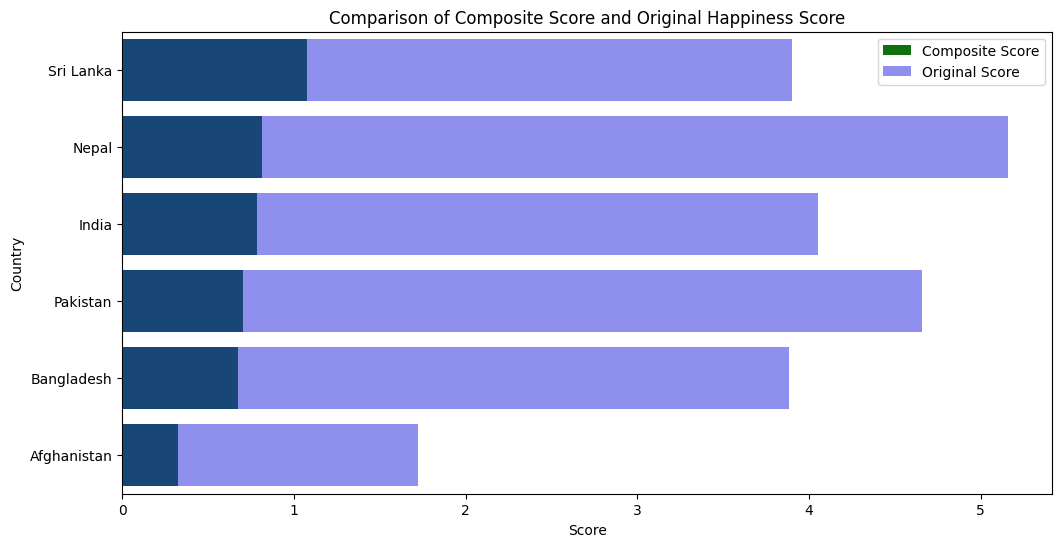

In [46]:
# Plotting comparison of the Composite Score vs Original Score
plt.figure(figsize=(12, 6))
sns.barplot(x='Composite Score', y='Country name', data=south_asia_sorted, color='green', label='Composite Score')
sns.barplot(x='score', y='Country name', data=south_asia_sorted, color='blue', alpha=0.5, label='Original Score')

plt.title("Comparison of Composite Score and Original Happiness Score")
plt.xlabel("Score")
plt.ylabel("Country")
plt.legend()
plt.show()

**Discussion:**

1. **Observations:**

  If the points lie close to the diagonal line in the scatter plot, the rankings based on Composite Score and Original Score are aligned.If there are deviations (points far from the diagonal), it indicates discrepancies between the two scores.

2. **Reasons for Differences:**

  * GDP per Capita Impact: Countries with higher GDP per Capita will have higher Composite Scores since it has a 40% weight.

  * Social Support and Life Expectancy: These factors also contribute (30% each) but might not fully align with the Original Happiness Score, which considers additional metrics like Freedom, Generosity, and Corruption.

3. **Implications:**

  Countries performing well economically (high GDP) but scoring low in social factors may rank higher on the Composite Score but not on the Original Score. Conversely, countries with strong social support and life expectancy but low GDP may have a better Original Score than their Composite Score.


3. **Task - 3 - Outlier Detection:**

Tasks:
1. Identify outlier countries in South Asia based on their Score and GDP per Capita.
2. Define outliers using the 1.5 × IQR rule.
3. Create a scatter plot with GDP per Capita on the x-axis and Score on the y-axis, highlighting outliers
in a different color.


In [47]:
Q1_score = south_asia['score'].quantile(0.25)
Q3_score = south_asia['score'].quantile(0.75)
IQR_score = Q3_score - Q1_score

Q1_gdp = south_asia['Log GDP per capita'].quantile(0.25)
Q3_gdp = south_asia['Log GDP per capita'].quantile(0.75)
IQR_gdp = Q3_gdp - Q1_gdp

outlier_condition = ((south_asia['score'] < Q1_score - 1.5 * IQR_score) |
                     (south_asia['score'] > Q3_score + 1.5 * IQR_score)) | \
                    ((south_asia['Log GDP per capita'] < Q1_gdp - 1.5 * IQR_gdp) |
                     (south_asia['Log GDP per capita'] > Q3_gdp + 1.5 * IQR_gdp))

outliers = south_asia[outlier_condition]
print("Outliers based on Score and GDP per Capita:")
outliers[['Country name', 'score', 'Log GDP per capita']]



Outliers based on Score and GDP per Capita:


,Country name,score,Log GDP per capita
142,Afghanistan,1.721,0.628


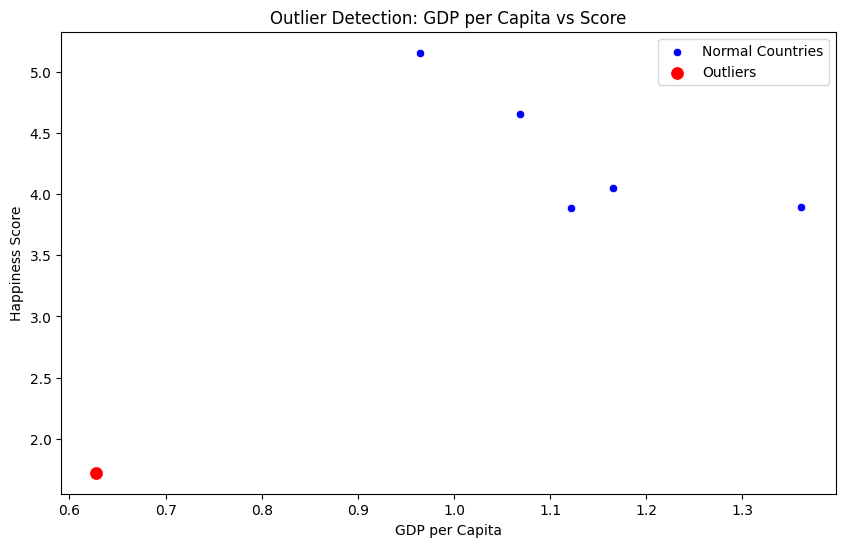

In [48]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=south_asia, color='blue', label="Normal Countries")
sns.scatterplot(x='Log GDP per capita', y='score', data=outliers, color='red', label="Outliers", s=100)

plt.title("Outlier Detection: GDP per Capita vs Score")
plt.xlabel("GDP per Capita")
plt.ylabel("Happiness Score")
plt.legend()
plt.show()


**4. Discuss the characteristics of these outliers and their potential impact on regional averages.**

**From the output of the scatter plot and outlier detection, we can analyze the characteristics of these outliers:**

**Characteristics of Outliers**:

1. **Low Outliers:**

  Countries with very low GDP per Capita or low happiness Score. For example, Countries experiencing economic instability, conflict, or poor governance, pull down the regional averages of happiness Score.

2. **High Outliers:**

  Countries with a higher happiness Score despite having a lower GDP per Capita. This could indicate strong contributions from social support, life expectancy, or generosity. These countries can skew regional averages upwards.

3. **Combined Outliers:**

  Countries that are outliers in both GDP per Capita and Score are extreme cases. For example, a country with unusually high GDP per Capita but a very low happiness Score may suffer from inequality or corruption.


**Potential Impact on Regional Averages:**

1. **Downward Pull:**

  Countries with extremely low Scores reduce the mean happiness Score of South Asia. This may not reflect the general trend of happiness in the region.

2. **Upward Push:**

  Countries with abnormally high Scores raise the regional average.
However, these outliers might not represent the broader socio-economic conditions.

3. Economic and Policy Insights:

  Outliers reveal key challenges or strengths that are worth further investigation:

  * Countries with low GDP but higher happiness emphasize the role of social indicators.

  * Countries with high GDP but low happiness highlight issues like inequality, governance, or freedom.

4. **Task - 4 - Exploring Trends Across Metrics:**

Tasks:

**1. Choose two metrics (e.g., Freedom to Make Life Choices and Generosity) and calculate their correlation
{pearson correlation} with the Score for South Asian countries. *italicized text**



In [49]:
south_asia = data[data['Country name'].isin(south_asian_countries)]

cor_freedom = south_asia['Freedom to make life choices'].corr(south_asia['score'])
cor_generosity = south_asia['Generosity'].corr(south_asia['score'])

print(f"Correlation between 'Freedom to Make Life Choices' and Score: {cor_freedom:.3f}")
print(f"Correlation between 'Generosity' and Score: {cor_generosity:.3f}")


Correlation between 'Freedom to Make Life Choices' and Score: 0.801
Correlation between 'Generosity' and Score: 0.875


**2. Create scatter plots with trendlines for these metrics against the Score.**

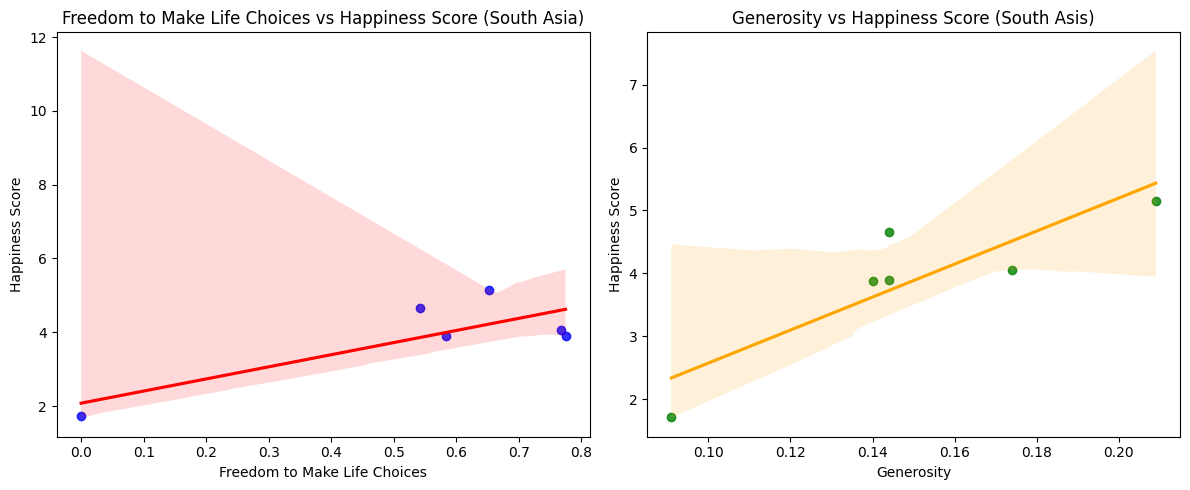

In [51]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.regplot(x='Freedom to make life choices', y='score', data=south_asia, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title("Freedom to Make Life Choices vs Happiness Score (South Asia)")
plt.xlabel("Freedom to Make Life Choices")
plt.ylabel("Happiness Score")

plt.subplot(1, 2, 2)
sns.regplot(x='Generosity', y='score', data=south_asia, scatter_kws={"color": "green"}, line_kws={"color": "orange"})
plt.title("Generosity vs Happiness Score (South Asis)")
plt.xlabel("Generosity")
plt.ylabel("Happiness Score")

plt.tight_layout()
plt.show()


**3. Identify and discuss the strongest and weakest relationships between these metrics and the Score for
South Asian countries.**

**Observations**

*  **According to Correlation Values:**
  
   Ans:- As higher absolute value of correlation indicates a stronger relationship, Freedom to Make Life Choices shows a strong positive correlation with the Score and Generosity shows a weak positive correlation.


*  **Visual Analysis:**

   Ans:- In the scatter plots, the regression line for Freedom to Make Life Choices would be closer to the data points, indicating a stronger trend and The regression line for Generosity would appear flatter with more scattered points, showing a weaker relationship.

Freedom to Make Life Choices likely contributes more to happiness in South Asian countries compared to Generosity.



5. **Task - 5 - Gap Analysis:**

**Tasks:**

**1. Add a new column, GDP-Score Gap, which is the difference between GDP per Capita and the Score
for each South Asian country**

In [53]:
south_asia['GDP-Score Gap'] = south_asia['Log GDP per capita'] - south_asia['score']
south_asia[['Country name', 'Log GDP per capita', 'score', 'GDP-Score Gap']]

<ipython-input-53-27bf82d6aaf3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_asia['GDP-Score Gap'] = south_asia['Log GDP per capita'] - south_asia['score']


,Country name,Log GDP per capita,score,GDP-Score Gap
92,Nepal,0.965,5.158,-4.193
107,Pakistan,1.069,4.657,-3.588
125,India,1.166,4.054,-2.888
127,Sri Lanka,1.361,3.898,-2.537
128,Bangladesh,1.122,3.886,-2.764
142,Afghanistan,0.628,1.721,-1.093


**2. Rank the South Asian countries by this gap in both ascending and descending order.**



In [54]:
gap_ascending = south_asia.sort_values(by='GDP-Score Gap', ascending=True)

gap_descending = south_asia.sort_values(by='GDP-Score Gap', ascending=False)

print("Top countries with largest negative gaps:")
gap_ascending.head(6)


Top countries with largest negative gaps:


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,GDP-Score Gap
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,-4.193
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,-3.588
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,-2.888
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,-2.764
127,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,-2.537
142,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,-1.093


In [55]:
print("Top Countries with largest positive gaps:")
gap_descending.head(6)

Top Countries with largest positive gaps:


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,GDP-Score Gap
142,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,-1.093
127,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,-2.537
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,-2.764
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,-2.888
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,-3.588
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,-4.193


**3. Highlight the top 3 countries with the largest positive and negative gaps using a bar chart.**

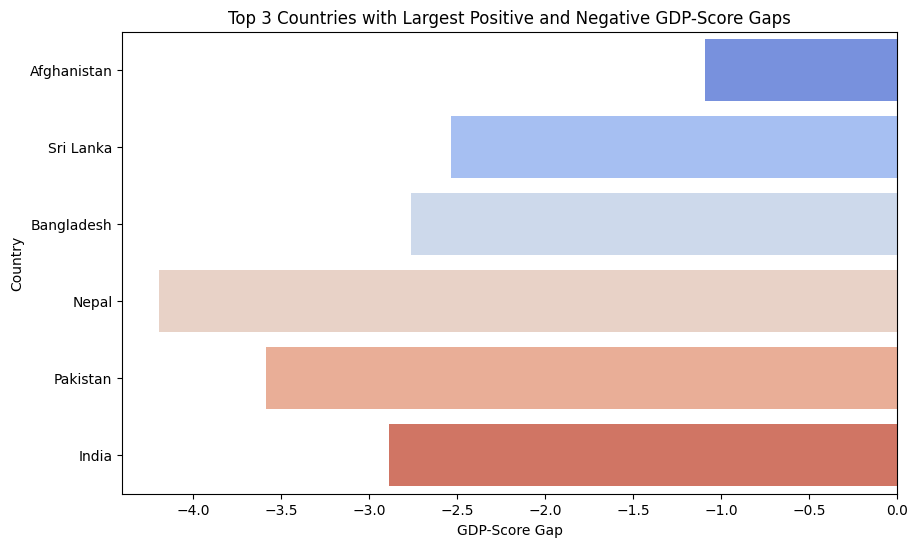

In [58]:
top3_positive = gap_descending.head(3)
top3_negative = gap_ascending.head(3)

# Creating a combined DataFrame to show both positive and negative gaps
combined_top_3 = pd.concat([top3_positive[['Country name', 'GDP-Score Gap']],
                            top3_negative[['Country name', 'GDP-Score Gap']]])

# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='GDP-Score Gap', y='Country name',hue="Country name", data=combined_top_3, palette="coolwarm")
plt.title("Top 3 Countries with Largest Positive and Negative GDP-Score Gaps")
plt.xlabel("GDP-Score Gap")
plt.ylabel("Country")
plt.show()


**4. Analyze the reasons behind these gaps and their implications for South Asian countries.**


In [59]:
# 4. Analyze the reasons behind these gaps and their implications for South Asian countries
print("Top 3 countries with the largest positive GDP-Score Gap:")
print(top3_positive[['Country name', 'GDP-Score Gap']])

print("\nTop 3 countries with the largest negative GDP-Score Gap:")
print(top3_negative[['Country name', 'GDP-Score Gap']])

Top 3 countries with the largest positive GDP-Score Gap:
    Country name  GDP-Score Gap
142  Afghanistan         -1.093
127    Sri Lanka         -2.537
128   Bangladesh         -2.764

Top 3 countries with the largest negative GDP-Score Gap:
    Country name  GDP-Score Gap
92         Nepal         -4.193
107     Pakistan         -3.588
125        India         -2.888


*   Positive Gaps:

    Answer:- Countries with high GDP per captia relative to their happiness Score have large positive gaps. This suggests  that while these countries have strong economic indicators, other factors such as social support, life expectancy, or freedom might not be contributing as significantly to happiness. For example, A country with wealth but lower life satisfaction may face social inequalities or corruption issues

*   Negative Gaps:
    Answer:- Countries with negative gap have a low GDP per captia but still achieve a relatively high happiness Score. This indicates that factors such as social support, freedom, or generosity compensate for economic shortcomings. For example, Countries with strong community values or life satisfaction despite poverty.

*   Implications for South Asian Countries:
    * South Asia often experiences economic challenges (low GDP), yet some countries achieve happiness through strong social bonds and support systems.

    * Policymakers in countries with positive gaps should focus on improving non-economic factors like:
      * Healthcare
      * Education
      * Freedom to make life choices
      * Trust in institutions
    
    * Countries with negative gaps can explore ways to balance economic growth while maintaining their social strengths.



# **3.3 Problem - 3 - Comparative Analysis:**

**Setup Task - Preparing the Middle Eastern Dataset**

In [61]:
middle_east_countries = ["Bahrain", "Iran", "Iraq", "Israel", "Jordan",
                         "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar",
                         "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"]

middle_east = data[data['Country name'].isin(middle_east_countries)]

middle_east[['Country name', 'score', 'Log GDP per capita', 'Social support',
                   'Healthy life expectancy', 'Freedom to make life choices', 'Generosity']]


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153
12,Kuwait,6.951,1.845,1.364,0.661,0.827,0.200
21,United Arab Emirates,6.733,1.983,1.164,0.563,0.815,0.209
27,Saudi Arabia,6.594,1.842,1.361,0.511,0.787,0.114
61,Bahrain,5.959,NaN,NaN,NaN,NaN,NaN
91,Iraq,5.166,1.249,0.996,0.498,0.425,0.141
99,Iran,4.923,1.435,1.136,0.571,0.366,0.235
124,Jordan,4.186,1.262,0.983,0.594,0.593,0.059
132,Yemen,3.561,0.671,1.281,0.293,0.362,0.080
141,Lebanon,2.707,1.377,0.577,0.556,0.173,0.068


**1. Descriptive Statistics:**

* **Calculate the Mean and Standard Deviation of the Score for Both Regions (South Asia and Middle East)**

In [62]:
mean_score_south_asia = south_asia['score'].mean()
std_score_south_asia = south_asia['score'].std()

mean_score_middle_east = middle_east['score'].mean()
std_score_middle_east = middle_east['score'].std()

print(f"South Asia - Mean score: {mean_score_south_asia}, Std: {std_score_south_asia}")
print(f"Middle East - Mean score: {mean_score_middle_east}, Std: {std_score_middle_east}")


South Asia - Mean score: 3.895666666666667, Std: 1.1770690152521504
Middle East - Mean score: 5.412100000000001, Std: 1.5662011684327144


* **Which Region Has Higher Happiness Scores on Average?**
  
    Middle East has higer Happiness score on average compared to that of South Asia.


**2. Top and Bottom Performers:**

* **Identify the top 3 and bottom 3 countries in each region based on the score.**


In [63]:
top3_south_asia = south_asia.nlargest(3, 'score')
bottom3_south_asia = south_asia.nsmallest(3, 'score')

top3_middle_east = middle_east.nlargest(3, 'score')
bottom3_middle_east = middle_east.nsmallest(3, 'score')

* **• Plot bar charts comparing these charts.**


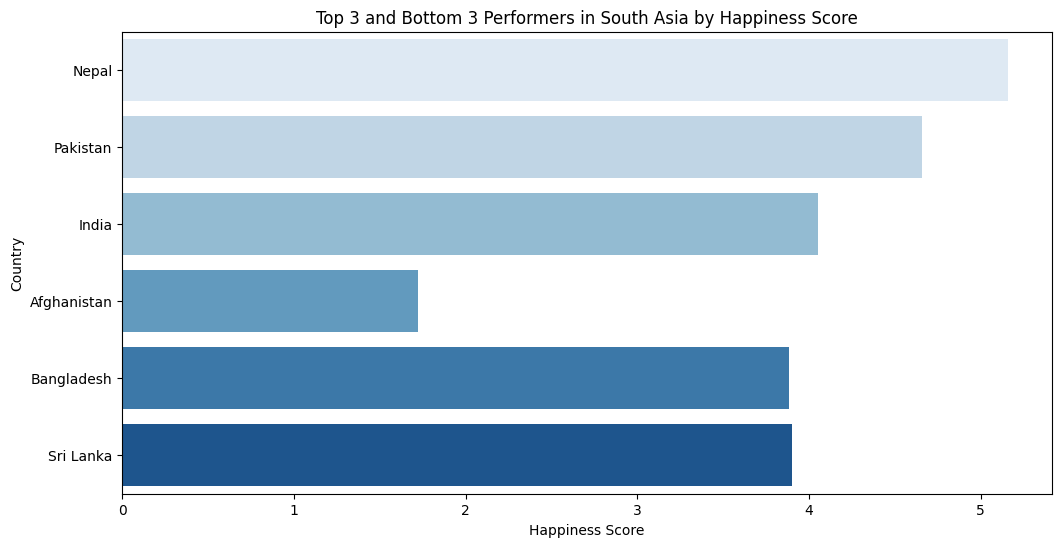

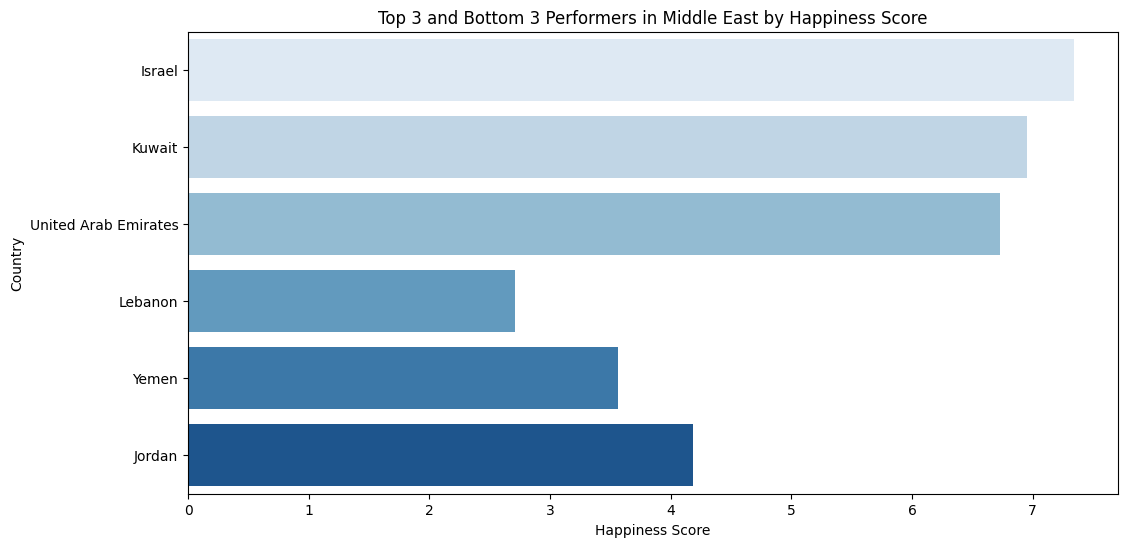

In [64]:
# Plotting top and bottom 3 performers for South Asia
plt.figure(figsize=(12, 6))
sns.barplot(x='score', y='Country name', data=pd.concat([top3_south_asia, bottom3_south_asia]),hue='Country name', palette="Blues")
plt.title("Top 3 and Bottom 3 Performers in South Asia by Happiness Score")
plt.xlabel("Happiness Score")
plt.ylabel("Country")
plt.show()

# Plotting top and bottom 3 performers for Middle East
plt.figure(figsize=(12, 6))
sns.barplot(x='score', y='Country name', data=pd.concat([top3_middle_east, bottom3_middle_east]),hue='Country name', palette="Blues")
plt.title("Top 3 and Bottom 3 Performers in Middle East by Happiness Score")
plt.xlabel("Happiness Score")
plt.ylabel("Country")
plt.show()

**3. Metric Comparisons:**

* **Compare key metrics like GDP per Capita, Social Support, and Healthy Life Expectancy between the regions using grouped bar charts.**


<ipython-input-65-80a8e0ba8bd9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_asia['Region'] = 'South Asia'
<ipython-input-65-80a8e0ba8bd9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  middle_east['Region'] = 'Middle East'


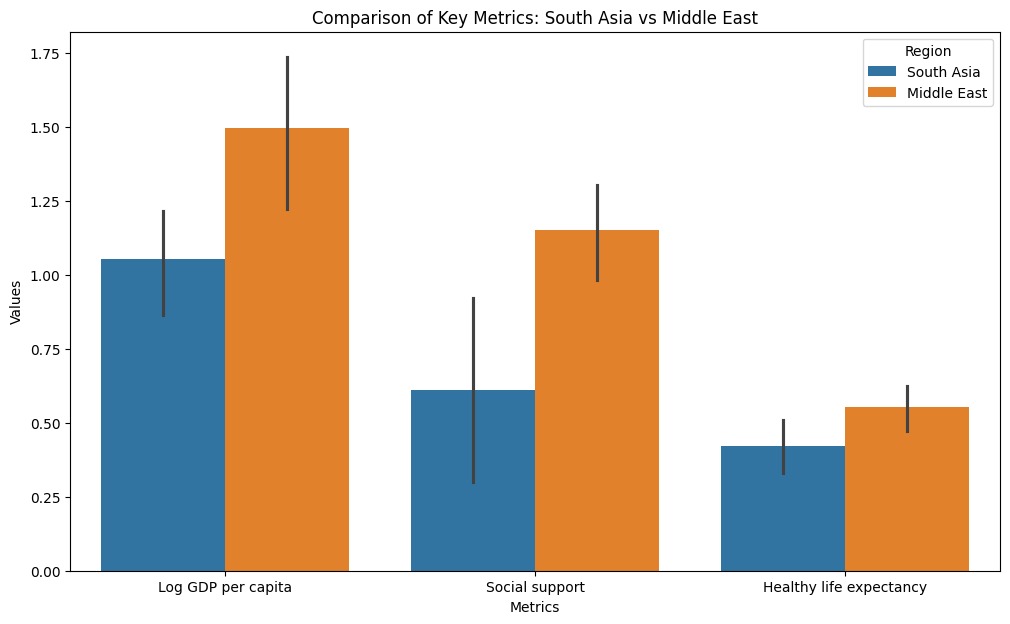

In [65]:
south_asia['Region'] = 'South Asia'
middle_east['Region'] = 'Middle East'

combined_data = pd.concat([south_asia[['Country name', 'Log GDP per capita', 'Social support', 'Healthy life expectancy', 'Region']],
                           middle_east[['Country name', 'Log GDP per capita', 'Social support', 'Healthy life expectancy', 'Region']]])

melted_data = pd.melt(combined_data, id_vars=["Region", "Country name"], value_vars=["Log GDP per capita", "Social support", "Healthy life expectancy"])

plt.figure(figsize=(12, 7))
sns.barplot(x='variable', y='value', hue='Region', data=melted_data)
plt.title("Comparison of Key Metrics: South Asia vs Middle East")
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.show()


* **Which metrics show the largest disparity between the two regions?**

    GDP per capita shows largest disparity between the two regions followed up Social Support and at last Healthy life expectancy.

**4. Happiness Disparity:**

* **Compute the range (max - min) and coefficient of variation (CV) for Score in both regions.**


In [66]:
range_south_asia = south_asia['score'].max() - south_asia['score'].min()
cv_south_asia = (std_score_south_asia / mean_score_south_asia) * 100

range_middle_east = middle_east['score'].max() - middle_east['score'].min()
cv_middle_east = (std_score_middle_east / mean_score_middle_east) * 100

print(f"South Asia - Range: {range_south_asia}, CV: {cv_south_asia}%")
print(f"Middle East - Range: {range_middle_east}, CV: {cv_middle_east}%")


South Asia - Range: 3.4370000000000003, CV: 30.21482883337427%
Middle East - Range: 4.634, CV: 28.938880812119404%


* **Which region has greater variability in happiness?**

    South Asia region has greater variability in happiness as it has larger CV then Middle east.

**5. Correlation Analysis:**

* **Analyze the correlation of Score with other metrics Freedom to Make Life Choices, and Generosity within each region.**


In [67]:
corr_south_asia_freedom = south_asia['score'].corr(south_asia['Freedom to make life choices'])
corr_south_asia_generosity = south_asia['score'].corr(south_asia['Generosity'])

corr_middle_east_freedom = middle_east['score'].corr(middle_east['Freedom to make life choices'])
corr_middle_east_generosity = middle_east['score'].corr(middle_east['Generosity'])

print(f"South Asia - Correlation with Freedom: {corr_south_asia_freedom}, Generosity: {corr_south_asia_generosity}")
print(f"Middle East - Correlation with Freedom: {corr_middle_east_freedom}, Generosity: {corr_middle_east_generosity}")


South Asia - Correlation with Freedom: 0.8005185224163315, Generosity: 0.874512371253192
Middle East - Correlation with Freedom: 0.8632202433827544, Generosity: 0.6275236536964182


* **Visualization**

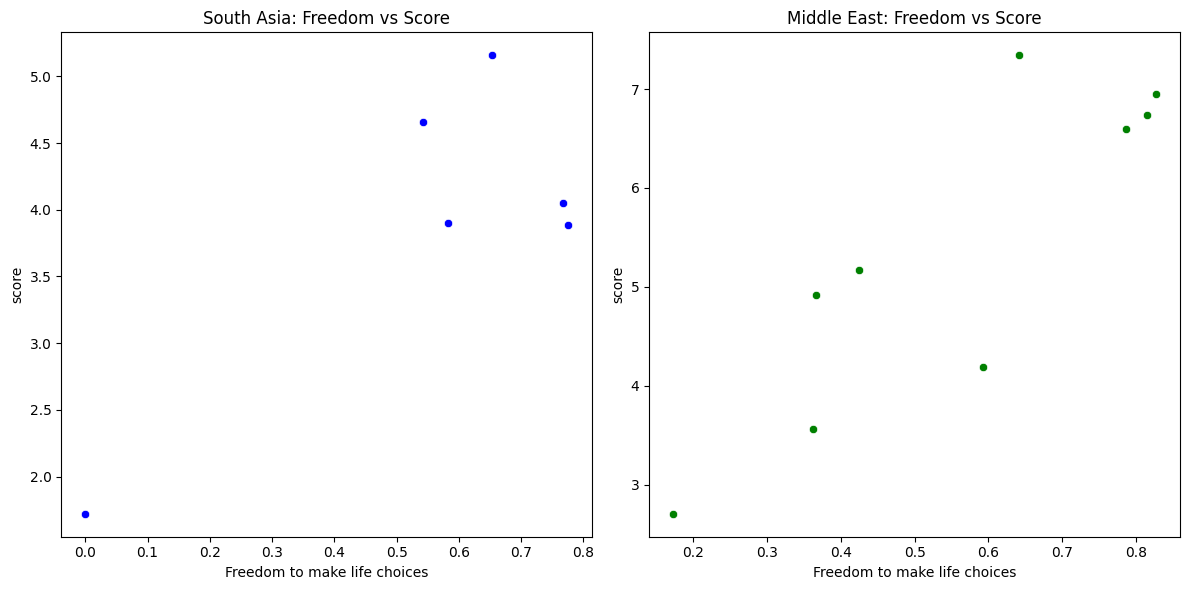

In [68]:
plt.figure(figsize=(12, 6))

# South Asia
plt.subplot(1, 2, 1)
sns.scatterplot(x='Freedom to make life choices', y='score', data=south_asia, color='blue')
plt.title("South Asia: Freedom vs Score")

# Middle East
plt.subplot(1, 2, 2)
sns.scatterplot(x='Freedom to make life choices', y='score', data=middle_east, color='green')
plt.title("Middle East: Freedom vs Score")

plt.tight_layout()
plt.show()


**6. Outlier Detection:**

* **Identify outlier countries in both regions based on Score and GDP per Capita.**


In [73]:
outliers_south_asia = south_asia[(south_asia['score'] < Q1_score - 1.5 * IQR_score) |
                                 (south_asia['score'] > Q3_score + 1.5 * IQR_score) |
                                 (south_asia['Log GDP per capita'] < Q1_gdp - 1.5 * IQR_gdp) |
                                 (south_asia['Log GDP per capita'] > Q3_gdp + 1.5 * IQR_gdp)]

outliers_middle_east = middle_east[(middle_east['score'] < Q1_score - 1.5 * IQR_score) |
                                   (middle_east['score'] > Q3_score + 1.5 * IQR_score) |
                                   (middle_east['Log GDP per capita'] < Q1_gdp - 1.5 * IQR_gdp) |
                                   (middle_east['Log GDP per capita'] > Q3_gdp + 1.5 * IQR_gdp)]


* **Plot these outliers and discuss their implications.**


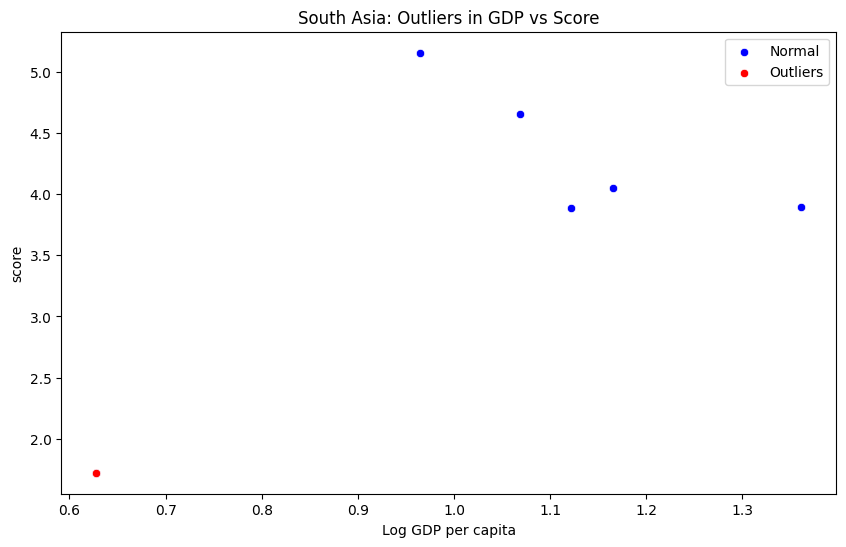

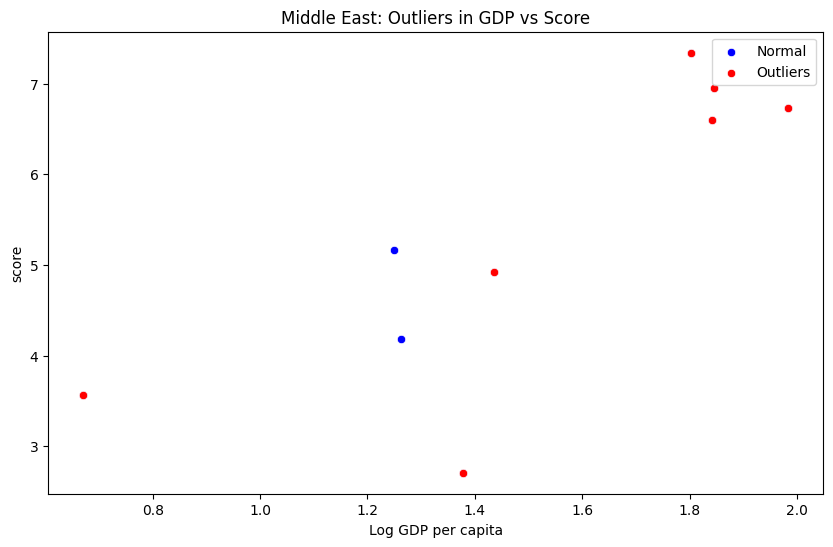

In [70]:
#South Asia
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=south_asia, color='blue', label='Normal')
sns.scatterplot(x='Log GDP per capita', y='score', data=outliers_south_asia, color='red', label='Outliers')
plt.title("South Asia: Outliers in GDP vs Score")
plt.legend()
plt.show()

#Middle East
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=middle_east, color='blue', label='Normal')
sns.scatterplot(x='Log GDP per capita', y='score', data=outliers_middle_east, color='red', label='Outliers')
plt.title("Middle East: Outliers in GDP vs Score")
plt.legend()
plt.show()

**7. Visualization:**

* **Create boxplots comparing the distribution of Score between South Asia and the Middle East.**


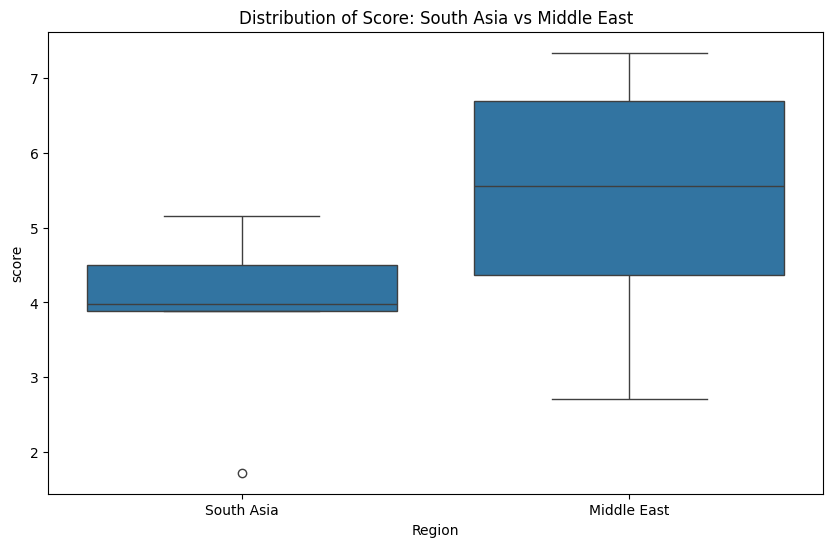

In [74]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='score', data=pd.concat([south_asia[['score', 'Region']], middle_east[['score', 'Region']]]))
plt.title("Distribution of Score: South Asia vs Middle East")
plt.show()


* **Interpret the key differences in distribution shapes, medians, and outliers.**


* **Shape:**

  * South Asia has a more skewed distribution with values concentrated in the lower range.

  * The Middle East has a more balanced or slightly right-skewed distribution.

* **Median:**

  * The median happiness score is lower in South Asia compared to the Middle East.

* **Variability:**

  * South Asia shows less variability (narrower IQR) in scores.

  * The Middle East has higher variability with a wider IQR.

* **Outliers:**

  * South Asia has low outliers indicating countries with very low happiness scores.

  * The Middle East has both high and low outliers, reflecting a greater disparity in happiness levels across the region.

